### Импортируйте библиотеку pandas как pd. Загрузите два датасета user_data и logs. Проверьте размер таблицы, типы переменных, наличие пропущенных значений, описательную статистику.

In [198]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
user_data=pd.read_csv('user_data.csv')

In [28]:
user_data.head()

,client,premium,age
0,46346,False,58
1,4391,False,55
2,27372,False,64
3,11989,False,44
4,60664,False,49


In [4]:
user_data.shape

(2954, 3)

In [5]:
user_data.dtypes

client     int64
premium     bool
age        int64
dtype: object

In [21]:
user_data.isna().sum()

client     0
premium    0
age        0
dtype: int64

In [12]:
user_data.describe()

,client,age
count,2954.000000,2954.000000
mean,50767.886594,44.196005
std,28800.505847,14.248336
min,40.000000,20.000000
25%,25639.500000,32.000000
50%,51569.500000,44.000000
75%,75963.250000,56.000000
max,99973.000000,69.000000


In [22]:
logs=pd.read_csv('logs.csv')

In [23]:
logs.head()

,client,success,platform,time
0,40177,True,phone,1585412212
1,61468,True,phone,1585425658
2,35604,False,phone,1585459894
3,9961,True,phone,1585400189
4,10931,True,computer,1585468629


In [24]:
logs.shape

(4500, 4)

In [25]:
logs.dtypes

client       int64
success       bool
platform    object
time         int64
dtype: object

In [26]:
logs.isna().sum()

client      0
success     0
platform    0
time        0
dtype: int64

In [27]:
logs.describe()

,client,time
count,4500.000000,4.500000e+03
mean,50998.758000,1.585440e+09
std,28374.472495,2.314866e+04
min,40.000000,1.585400e+09
25%,27056.500000,1.585420e+09
50%,52659.000000,1.585440e+09
75%,76001.250000,1.585461e+09
max,99993.000000,1.585480e+09


### Какой клиент совершил больше всего успешных операций? (success == True)

In [61]:
success_oper=logs.query('success==True')\
    .groupby('client',as_index=False)\
    .agg({'platform':'count'})\
    .rename(columns={'platform':'purchases'})\
    .sort_values('purchases', ascending=False)\



In [63]:
max_success=success_oper.purchases.max()

In [64]:
max_success

41

In [70]:
success_oper.query('purchases==@max_success').client.to_list()

[12179, 61468, 52870, 61473, 92584, 82563, 78349, 36165, 28719]

### С какой платформы осуществляется наибольшее количество успешных операций?    

In [93]:
logs.query('success==True').platform.value_counts().idxmax()

'phone'

### Какую платформу предпочитают премиумные клиенты?

In [97]:
user_logs=user_data.merge(right=logs,on='client',how='inner')

In [100]:
user_logs.head()

,client,premium,age,success,platform,time
0,46346,False,58,True,phone,1585452839
1,4391,False,55,False,phone,1585409861
2,27372,False,64,False,phone,1585446018
3,11989,False,44,True,computer,1585403698
4,60664,False,49,True,phone,1585406918


In [102]:
user_logs.query('premium==True').platform.value_counts().idxmax()

'phone'

### Визуализируйте распределение возраста клиентов в зависимости от типа клиента (премиум или нет)

In [104]:
user_data.head()

,client,premium,age
0,46346,False,58
1,4391,False,55
2,27372,False,64
3,11989,False,44
4,60664,False,49


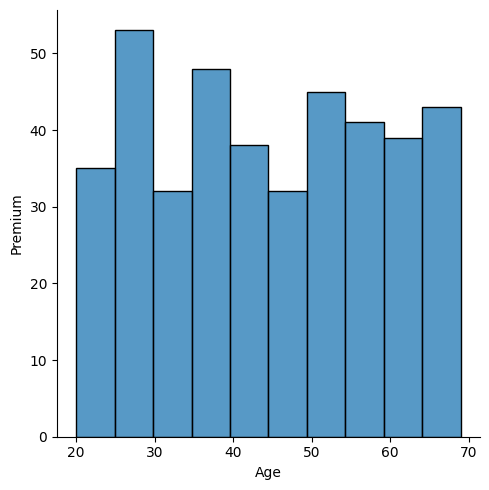

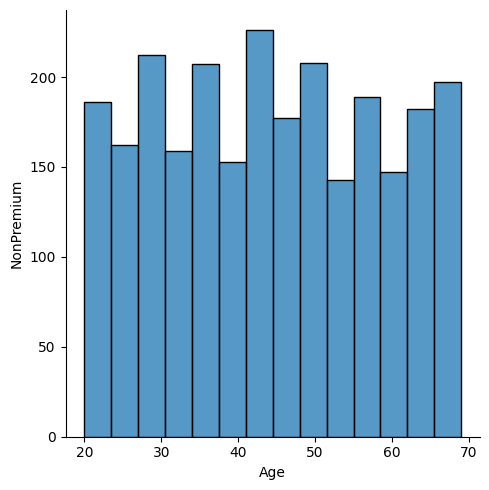

In [121]:
tx=sns.displot(data=user_data.query('premium==True').age)
tx.set(xlabel='Age',ylabel='Premium')
    
fx=sns.displot(data=user_data.query('premium==False').age)
fx.set(xlabel='Age',ylabel='NonPremium')


### Постройте график распределения числа успешных операций

In [123]:
logs.head()

,client,success,platform,time
0,40177,True,phone,1585412212
1,61468,True,phone,1585425658
2,35604,False,phone,1585459894
3,9961,True,phone,1585400189
4,10931,True,computer,1585468629


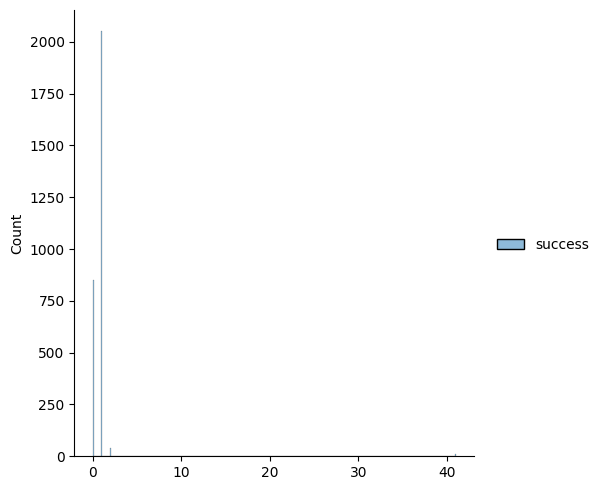

In [136]:
sns.displot(user_logs.groupby('client')\
                     .agg({'success':'sum'}))

### Визуализируйте число успешных операций, сделанных на платформе computer, в зависимости от возраста, используя sns.countplot (x – возраст, y – число успешных операций). Клиенты какого возраста совершили наибольшее количество успешных действий?

In [173]:
age_success=user_logs.query('platform=="computer" and success==True')
                         

In [174]:
age_success

,client,premium,age,success,platform,time
3,11989,False,44,True,computer,1585403698
12,32406,False,24,True,computer,1585479382
14,62404,False,40,True,computer,1585430097
20,68848,False,35,True,computer,1585440553
26,49675,False,48,True,computer,1585402108
...,...,...,...,...,...,...
3414,93718,False,63,True,computer,1585466349
3415,13688,True,66,True,computer,1585453923
3417,68348,False,69,True,computer,1585456739
3427,9450,False,34,True,computer,1585446079


[Text(0.5, 0, 'Age'), Text(0, 0.5, 'Success_Operations')]

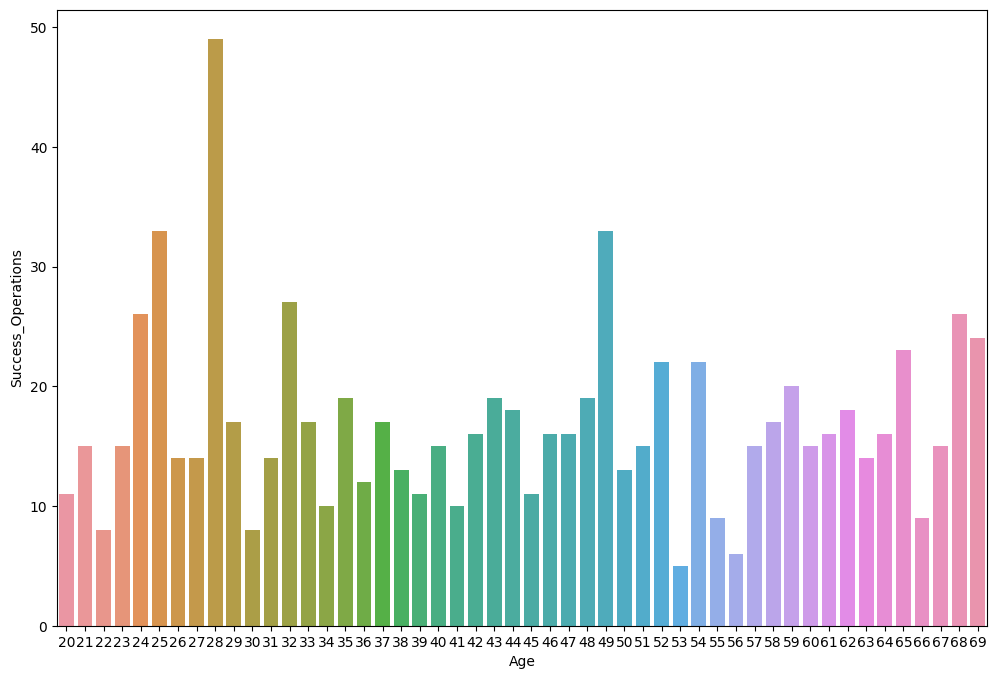

In [202]:
plt.figure(figsize=(12,8))
csa=sns.countplot(data=age_success,x=age_success.age)
csa.set(xlabel='Age',ylabel='Success_Operations')
